# Overview Analysis 
## Top 5 States that have the highest number of car accidents per Accident Rate

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import geoplot as gplt 
import geoplot.crs as gcrs
import warnings
import zipfile

current_wd=os.getcwd()


In [ ]:
current_wd

'/Users/tranghoang/Documents/vanderbilt/ms_in_data_science/ds_eda/eda-final'

In [ ]:
df = pd.read_csv(f'{current_wd}/data/processed_us_car_accidents_2022.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lattitude,Start_Longitude,End_Lattitude,End_Longitude,Distance(mi),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,State_Abbrv,Population
0,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,41.946796,-88.208092,0.00,...,29.24,10.0,CALM,0.0,0.0,Fair,True,Night,IL,12582032
1,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,34.521172,-117.958076,0.00,...,27.35,10.0,W,6.0,0.0,Fair,False,Night,CA,39029342
2,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,37.542839,-77.441780,0.00,...,29.71,10.0,N,8.0,0.0,Mostly Cloudy,True,Night,VA,8683619
3,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,40.896629,-81.178452,0.00,...,28.71,7.0,NNE,6.0,0.0,Mostly Cloudy,False,Night,OH,11756058
4,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,41.409359,-81.644318,1.91,...,29.37,7.0,SSE,3.0,0.0,Partly Cloudy,False,Night,OH,11756058


In [ ]:
df[['ID','State','Population']].head(10)

,ID,State,Population
0,A-512230,IL,12582032
1,A-512231,CA,39029342
2,A-512232,VA,8683619
3,A-512233,OH,11756058
4,A-512234,OH,11756058
5,A-512235,PA,12972008
6,A-512236,OH,11756058
7,A-512237,OH,11756058
8,A-512238,SC,5282634
9,A-512239,SC,5282634


In [ ]:
len(df['Population'].unique())

49

,State,Counts,Population,Accidents Per Capita
30,DC,6888,671803,0.010253
2,VA,99015,8683619,0.011403
1,FL,262225,22244823,0.011788
26,MT,14072,1122867,0.012532
5,SC,83882,5282634,0.015879


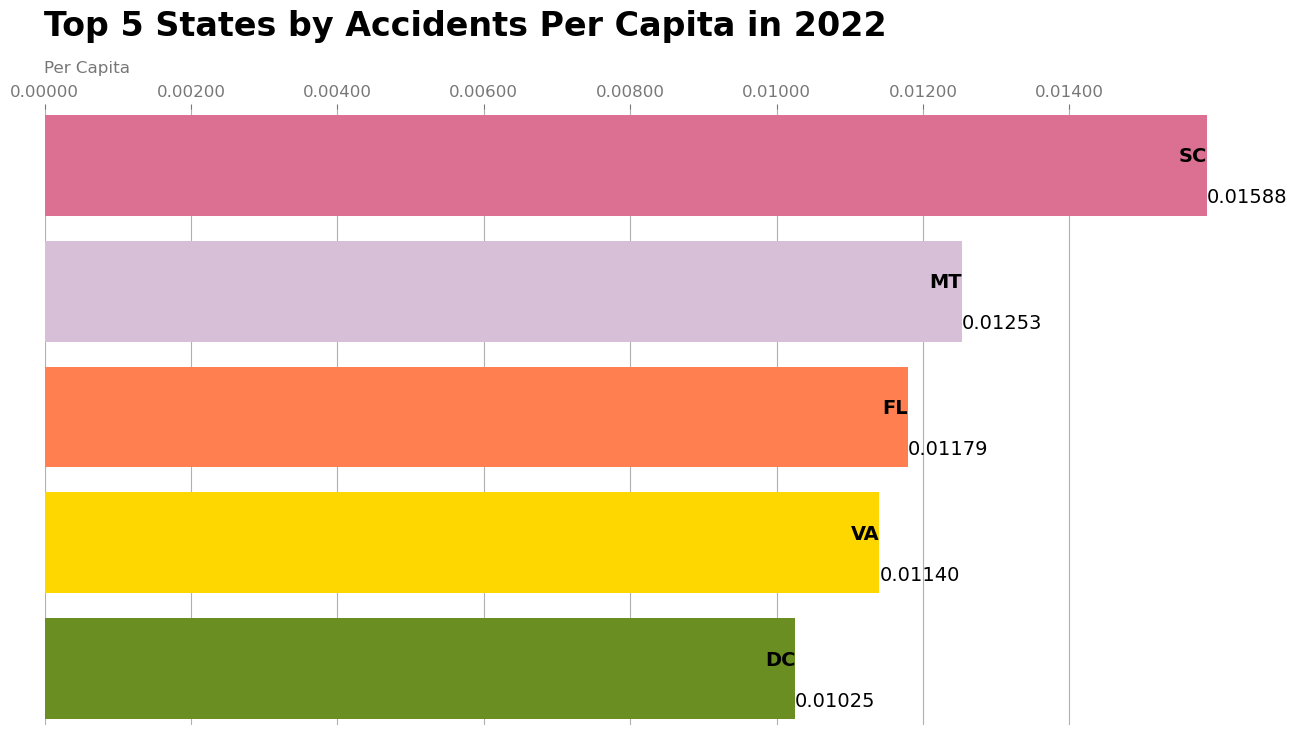

In [ ]:

# Generate the data for figures
# Count number of accidents 
accident_counts = df['State'].value_counts().reset_index()
accident_counts.columns = ['State', 'Counts']

# Extract population per state (assuming the population is the same for each state entry)
population_data = df[['State', 'Population']].drop_duplicates()

# Merge the counts with the population data
accidents_per_capita = accident_counts.merge(population_data, on='State')


# Calculate accidents per capita
accidents_per_capita['Accidents Per Capita'] = accidents_per_capita['Counts'] / accidents_per_capita['Population']


# Find top 5 states that has highest accidents per capita

top_accidents_per_capita = accidents_per_capita.sort_values('Accidents Per Capita', ascending = False)[:5]
top_accidents_per_capita = top_accidents_per_capita[::-1]   # flip values from top to bottom
top_accidents_per_capita


# Create visualizations
# Define colors for the bars
colors = ['olivedrab', 'gold', 'coral', 'thistle', 'palevioletred']

# Creating the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(top_accidents_per_capita['State'], top_accidents_per_capita['Accidents Per Capita'], color=colors)

# Adding text labels
for i, (value, name) in enumerate(zip(top_accidents_per_capita['Accidents Per Capita'], top_accidents_per_capita['State'])):
    ax.text(value, i, name, size=14, weight=600, ha='right', va='bottom')
    ax.text(value, i-.25, f'{value:.5f}', size=14, ha='left', va='center')

# Additional style settings
ax.text(0, 1.06, 'Per Capita', transform=ax.transAxes, size=12, color='#777777')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.5f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, 'Top 5 States by Accidents Per Capita in 2022',
        transform=ax.transAxes, size=24, weight=600, ha='left')

plt.box(False)

# Save the figure
fig.savefig(f"{current_wd}/top_accidents_per_capita.png", dpi=300)

# Display the figure
plt.show()